In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv("data/weight-height.csv")

data["height_cm"] = data["Height"]*2.54
data["weight_kg"] = data["Weight"]*0.453592
data = data.drop(["Height", "Weight"], 1)
data["factor"] = data.weight_kg / data.height_cm
data["Gender"] = data["Gender"].apply(lambda x: int(x == "Male"))

In [3]:
data.head()


,Gender,height_cm,weight_kg,factor
0,1,187.571423,109.720985,0.584956
1,1,174.706036,73.622732,0.421409
2,1,188.239668,96.497550,0.512631
3,1,182.196685,99.809504,0.547812
4,1,177.499761,93.598619,0.527317


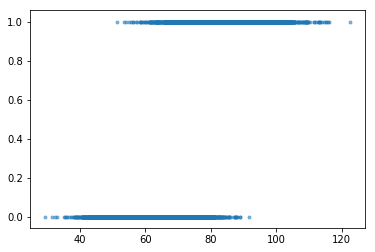

In [7]:
plt.scatter(data.weight_kg, data.Gender, marker=".", alpha=0.5);

$$\sigma (X) = \frac{1}{1+e^{-X}}$$

$$\frac{d\sigma (X)}{dX} = \sigma(X)*(1-\sigma(X))$$

$$NLLLoss (CrossEntropy, LogLoss) = \sum_{i=1}^{N} \left( y^*_i* log(y_i) + (1-y^*_i)*log(1-y_i)\right)$$

$$NLLLoss = \sum_{i=1}^{N} \left( y^*_i* log(\sigma(k*x_i+b)) + (1-y^*_i)*log(1-\sigma(k*x_i+b))\right)$$

In [8]:
X = data[["weight_kg", "height_cm"]].values
y = data["Gender"].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=data.Gender)

In [16]:
X_train = torch.tensor(X_train, dtype=torch.float32).cuda()
X_val = torch.tensor(X_val, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train, dtype=torch.float32).cuda()
y_val = torch.tensor(y_val, dtype=torch.float32).cuda()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserW

In [26]:
linear = torch.nn.Linear(2, 1)
linear = linear.to("cuda")

In [27]:
%%time
loss_f = torch.nn.BCELoss()
opt = torch.optim.Adam(linear.parameters(), lr=1e-3)

for i in range(100):
    out = torch.sigmoid(linear(X_train))
    loss = loss_f(out, y_train)
    loss.backward()
    print(loss.detach())
    
    opt.step()
    opt.zero_grad()

tensor(2.2831, device='cuda:0')
tensor(2.1844, device='cuda:0')
tensor(2.0870, device='cuda:0')
tensor(1.9909, device='cuda:0')
tensor(1.8965, device='cuda:0')
tensor(1.8037, device='cuda:0')
tensor(1.7128, device='cuda:0')
tensor(1.6238, device='cuda:0')
tensor(1.5370, device='cuda:0')
tensor(1.4523, device='cuda:0')
tensor(1.3700, device='cuda:0')
tensor(1.2902, device='cuda:0')
tensor(1.2130, device='cuda:0')
tensor(1.1385, device='cuda:0')
tensor(1.0669, device='cuda:0')
tensor(0.9981, device='cuda:0')
tensor(0.9324, device='cuda:0')
tensor(0.8698, device='cuda:0')
tensor(0.8104, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7012, device='cuda:0')
tensor(0.6515, device='cuda:0')
tensor(0.6049, device='cuda:0')
tensor(0.5616, device='cuda:0')
tensor(0.5215, device='cuda:0')
tensor(0.4845, device='cuda:0')
tensor(0.4504, device='cuda:0')
tensor(0.4193, device='cuda:0')
tensor(0.3910, device='cuda:0')
tensor(0.3654, device='cuda:0')
tensor(0.3424, device='cuda:0')
tensor(0

In [33]:
with torch.no_grad():
    out = torch.sigmoid(linear(X_val))

In [37]:
predict = (out > 0.5).T.to(torch.int32)

In [41]:
torch.mean((predict == y_val).to(torch.float32))

tensor(0.9185, device='cuda:0')